<a href="https://colab.research.google.com/github/Kishan20438/Login-signup.com/blob/main/IHL_Final_Assignments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Introduction**

In [1]:
#Import the libraries
import pandas as pd
import pandas_datareader.data as pdr
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from matplotlib.patches import Patch
from sklearn.decomposition import PCA





In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd '/content/drive/MyDrive/Colab'

/content/drive/MyDrive/Colab


In [4]:
ls

 ChurnData.csv         hepatitis.csv                    total_cases.csv
 Demo_KNN_STU.ipynb    Logistic_regression_Demo.ipynb   train.csv
 drug200.csv           teleCust1000t.csv               'Wetland Data.csv'
 FuelConsumption.csv   Tesla.csv+-+Tesla.csv.csv        World_GDP.csv


In [5]:
#Read the csv file into a DataFrame
df = pd.read_csv(r"Tesla.csv+-+Tesla.csv.csv")
# Read the first 5
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [9]:
df.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988
1691,3/17/2017,264.000000,265.329987,261.200012,261.500000,6475900,261.500000


In [11]:
# Read the columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [12]:
# Get an idea of the size of the dataset (no of row and columns)
df.shape

(1692, 7)

There are 1692 rows and 7 columns in dataset


 Using .describe() gives a basic statistical summary of the variable such as its mean and its minimum/maximum value.

In [13]:
#Using .describe()
df.describe()
#df.info()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [ ]:
print((df.to_string()))

**2. Pre-processing & Exploratory Data Analysis (EDA)**

---



**2.1  Handle missing values**



In order to check whether our dataset contains missing values, we can use the function isna()

In [ ]:
# check missing values
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

The above output shows the there is no missing values in dataset.

Now we can count the percentage of missing values for each column, simply by dividing the previous result by the length of the dataset (`len(df)`) and multiplying by 100.

In [ ]:
df.isna().sum()/len(df)*100

Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Volume       0.0
Adj Close    0.0
dtype: float64

**2.2 Loading Dataset**

In [ ]:
# features (High price, Low price, Open price, Close price, Volume)
X = df.iloc[:, 0:5]
# response (Adj Close price)
y = df.iloc[:, 5:6]

In [ ]:
# plotting parameters
plt.rcParams['figure.figsize'] = (16,9)
plt.rcParams['axes.grid'] = True
plt.rcParams.update({'font.size': 12})

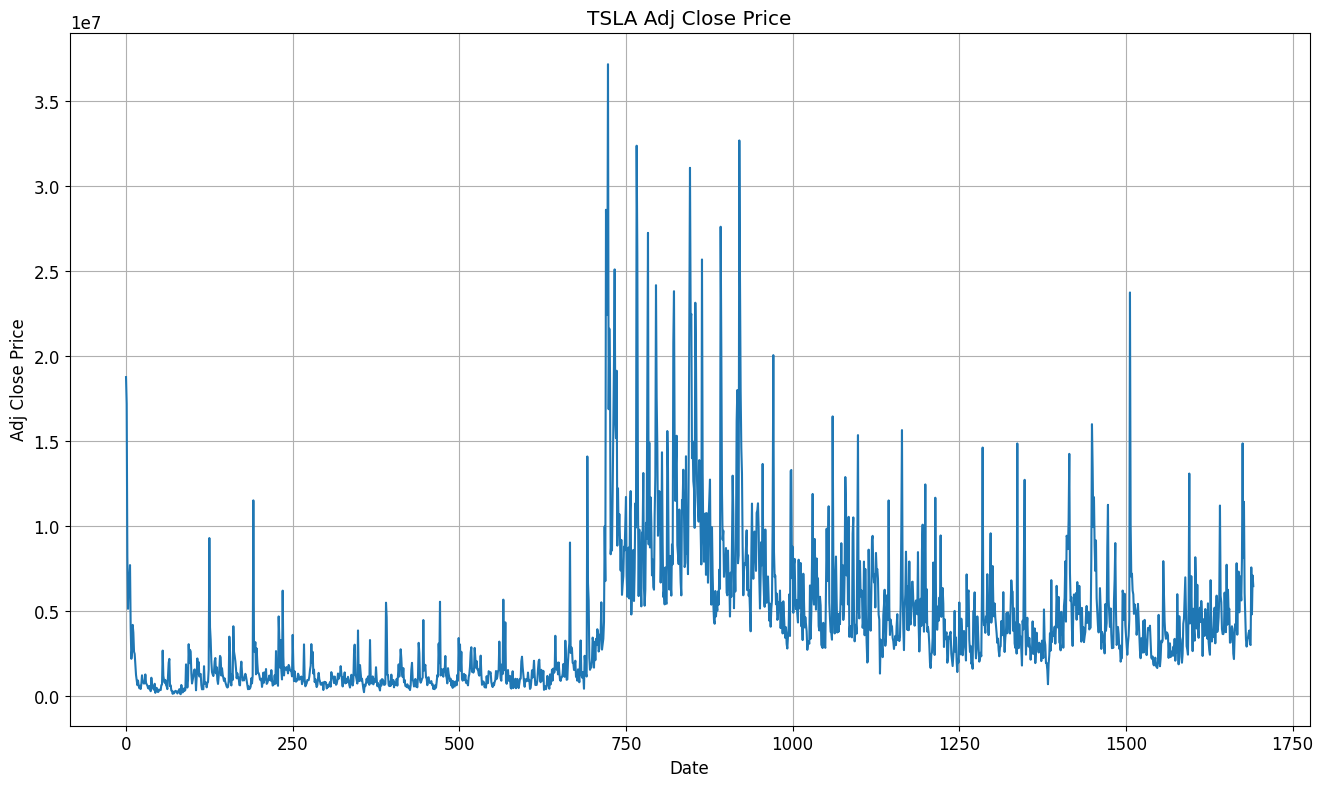

In [ ]:
# plotting TSLA Adj Close price from 2020-01-01 to 2020-12-31
plt.plot(df.index, y)
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('TSLA Adj Close Price')
plt.show()

**2.3 Normalising and converting data**

Text(0.5, 0, 'Open')

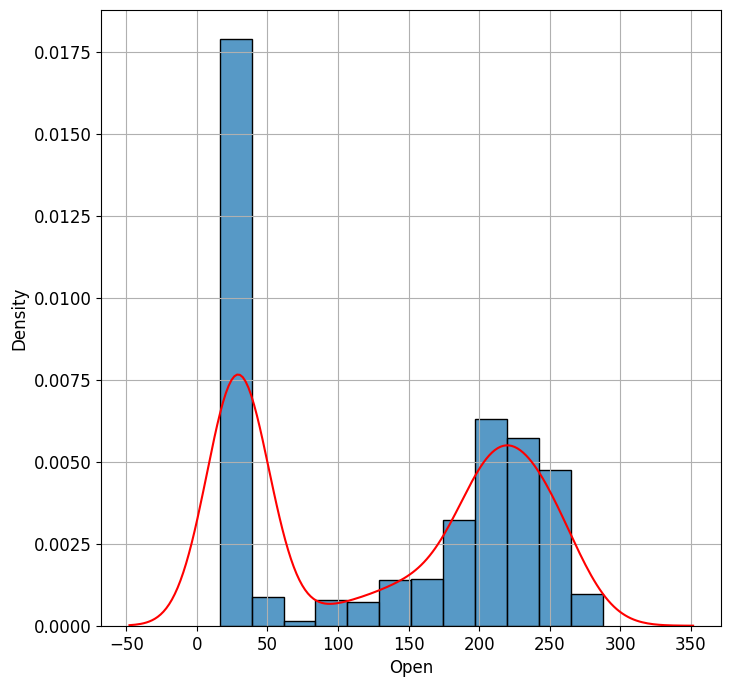

In [ ]:
# plot price to see distribution
plt.figure(figsize=(8,8))
sns.histplot(df, x="Open", stat="density")
sns.kdeplot(df["Open"], color="red")
plt.xlabel("Open")

In [ ]:
df_bar = df.Open.value_counts().nlargest(5).reset_index()
print(df_bar)
#df_bar = df_bar.rename(columns={"price":"count", "index":"price"})
#df_bar

   index  Open
0   30.0     6
1   28.0     6
2   28.5     5
3  220.0     5
4   33.5     4


In [ ]:
# normalizing datasets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
print('Training Set Shape ', X_train.shape, y_train.shape)

Training Set Shape  (1184, 5) (1184, 1)


**3. CORRELATION**

<ipython-input-19-3c0fe66b58a0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df_heatmap.corr(method="pearson"), annot=True, cmap='viridis')


Text(0.5, 1.0, 'Correlation Matrix')

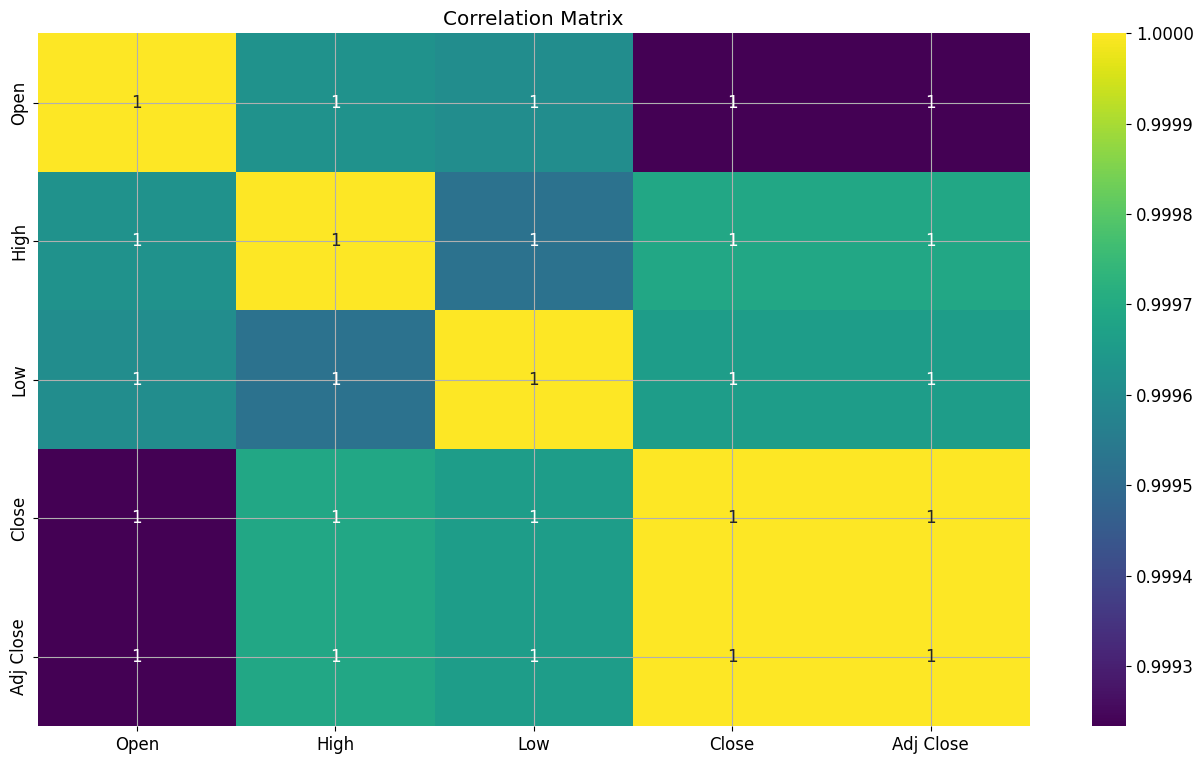

In [ ]:
# plot correlation matrix
df_heatmap = df.drop(columns=["Volume"])
ax = sns.heatmap(df_heatmap.corr(method="pearson"), annot=True, cmap='viridis')
ax.set_title("Correlation Matrix")

[Text(0.5, 0, 'Open'), Text(0, 0.5, 'Low')]

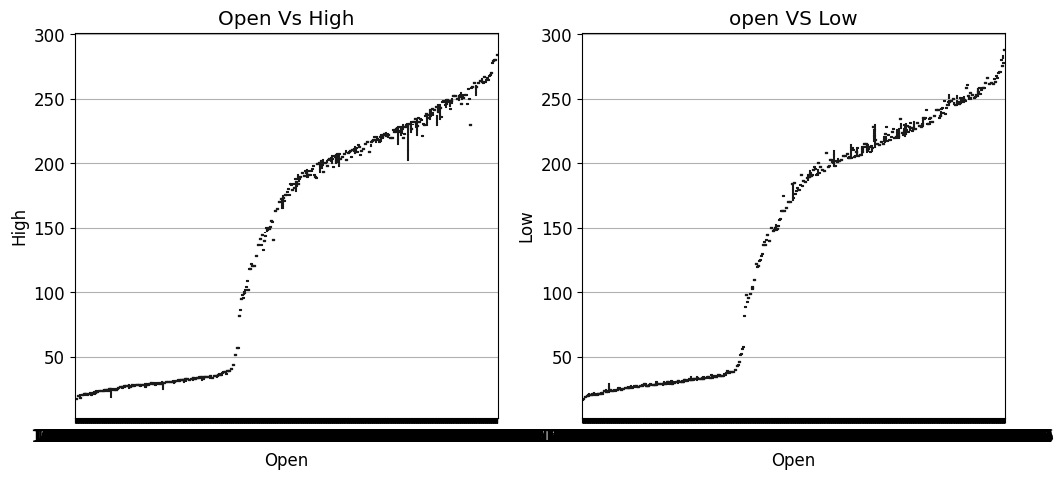

In [ ]:
f, axes = plt.subplots(1, 2)
f.set_size_inches(12, 5)

# subplot 1 aesthetics
ax = sns.boxplot(y="Open", x="High", data=df.sort_values("Open"), orient='v',
                 ax=axes[0], showfliers=False, palette="viridis")
ax.set_title("Open Vs High")
ax.set(xlabel="Open", ylabel="High")

# subplot 2 aesthetics
ax1 = sns.boxplot(y="Open", x="Low", data=df.sort_values("Low"), orient='v',
                  ax=axes[1], showfliers=False, palette="viridis")
ax1.set_title("open VS Low")
ax1.set(xlabel="Open", ylabel="Low")

Text(0, 0.5, 'Y-Axis')

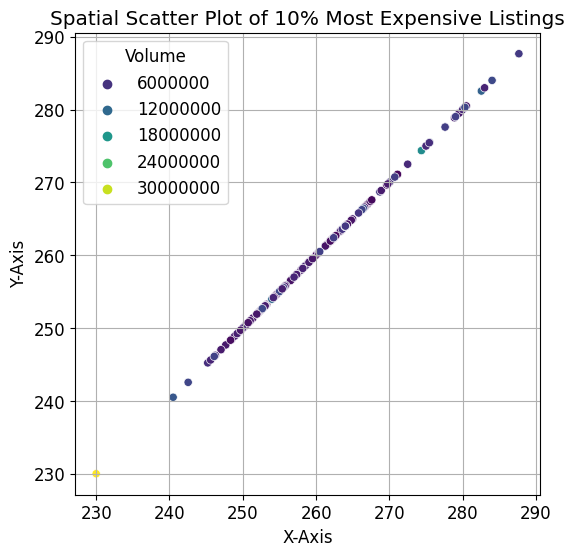

In [ ]:
# filter for top 10% of prices
df_high = df[df.High >= df.High.quantile(.90)]

# plot co-ordinates for these listings and colour by neighbourhood
plt.figure(figsize=(6,6))
sns.scatterplot(data=df_high, x="Open", y="Open", hue="Volume",
               palette="viridis")
plt.title("Spatial Scatter Plot of 10% Most Expensive Listings")
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")

**3. Statistics-based data analysis**

In [ ]:
# one hot encode and inspect first 5 rows of  new columns
df_ohe = pd.get_dummies(df, columns=["Open", "Close"], prefix='', prefix_sep='')
df_ohe = df_ohe.drop(columns=["High"])
df_ohe.iloc[:,-8:].head(5)

,280.600006,280.980011,281.100006,281.190002,282.109985,282.26001,284.119995,286.040009
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0


In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

**3.1 Simple Linear Regression**

 Plot to check the linearity

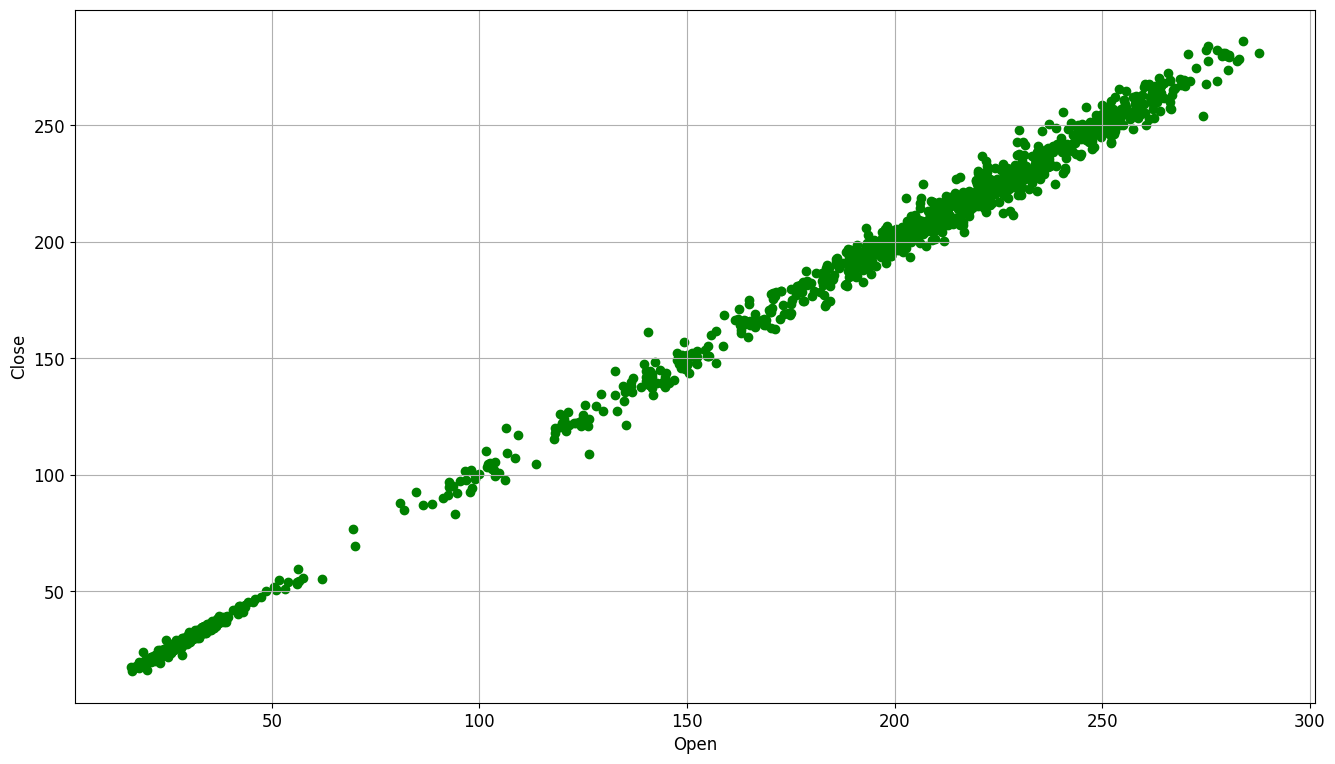

In [ ]:
plt.scatter(df.Open,df.Close, color='green')
plt.xlabel("Open")
plt.ylabel("Close")
plt.show()

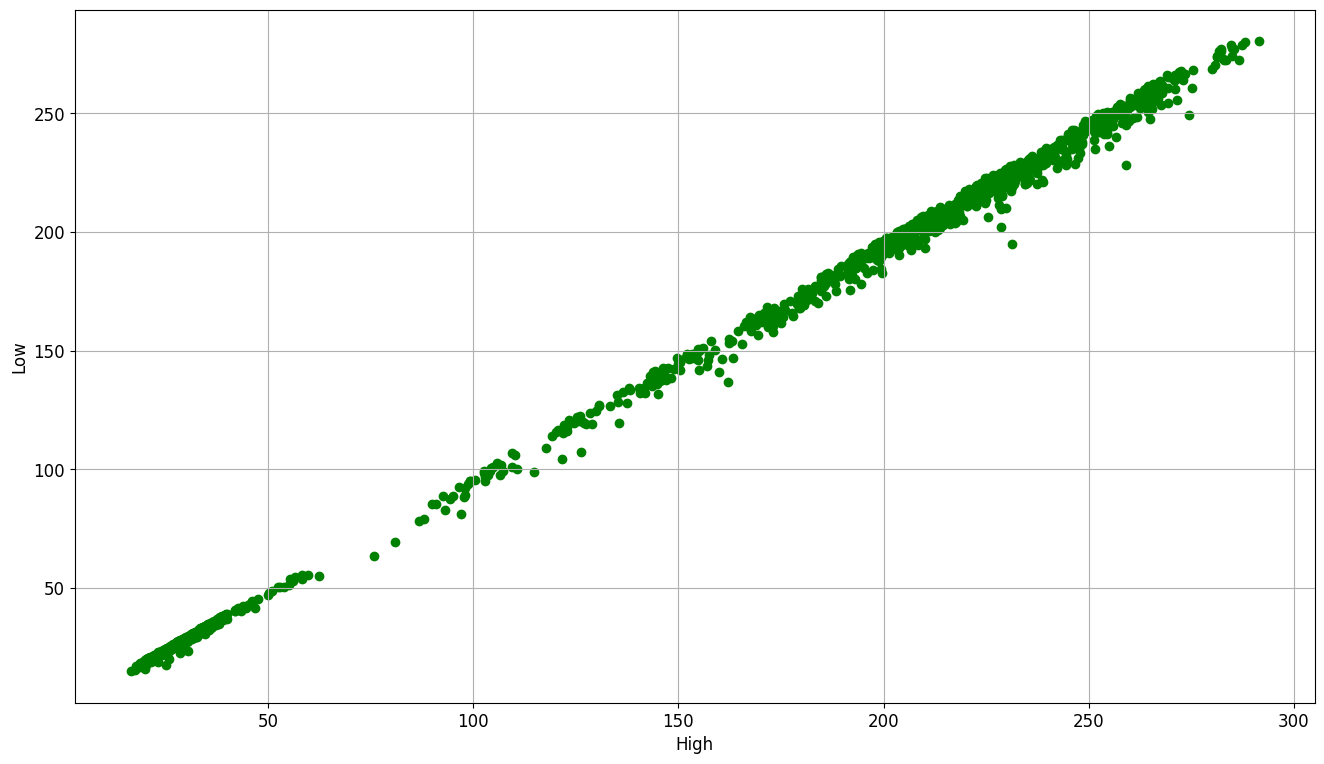

In [ ]:
plt.scatter(df.High,df.Low, color='Green')
plt.xlabel("High")
plt.ylabel("Low")
plt.show()

Train-test data preparation

In [ ]:
X=df[['Open']]
X


,Open
0,19.000000
1,25.790001
2,25.000000
3,23.000000
4,20.000000
...,...
1687,244.820007
1688,246.110001
1689,257.000000
1690,262.399994


In [ ]:
y=df[['Close']]
y

,Close
0,23.889999
1,23.830000
2,21.959999
3,19.200001
4,16.110001
...,...
1687,246.169998
1688,258.000000
1689,255.729996
1690,262.049988


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train)

            Open
1230  248.429993
630    33.380001
1649  236.699997
1114  241.160004
737    92.750000
...          ...
1258  261.950012
566    28.620001
1471  237.360001
233    30.000000
62     20.400000

[1133 rows x 1 columns]


In [ ]:
print(X_test)

            Open
1055  277.619995
1343  211.309998
136    28.590000
1405  190.789993
1132  221.509995
...          ...
1078  262.250000
739    95.250000
1536  225.690002
316    26.000000
147    24.740000

[559 rows x 1 columns]


In [ ]:
print(y_train)

           Close
1230  247.139999
630    33.220001
1649  235.580002
1114  231.639999
737    94.839996
...          ...
1258  262.019989
566    27.660000
1471  232.320007
233    28.520000
62     20.530001

[1133 rows x 1 columns]


In [ ]:
print(y_test)

           Close
1055  282.109985
1343  212.960007
136    26.959999
1405  189.699997
1132  227.820007
...          ...
1078  257.010010
739    97.349998
1536  230.610001
316    24.590000
147    24.920000

[559 rows x 1 columns]


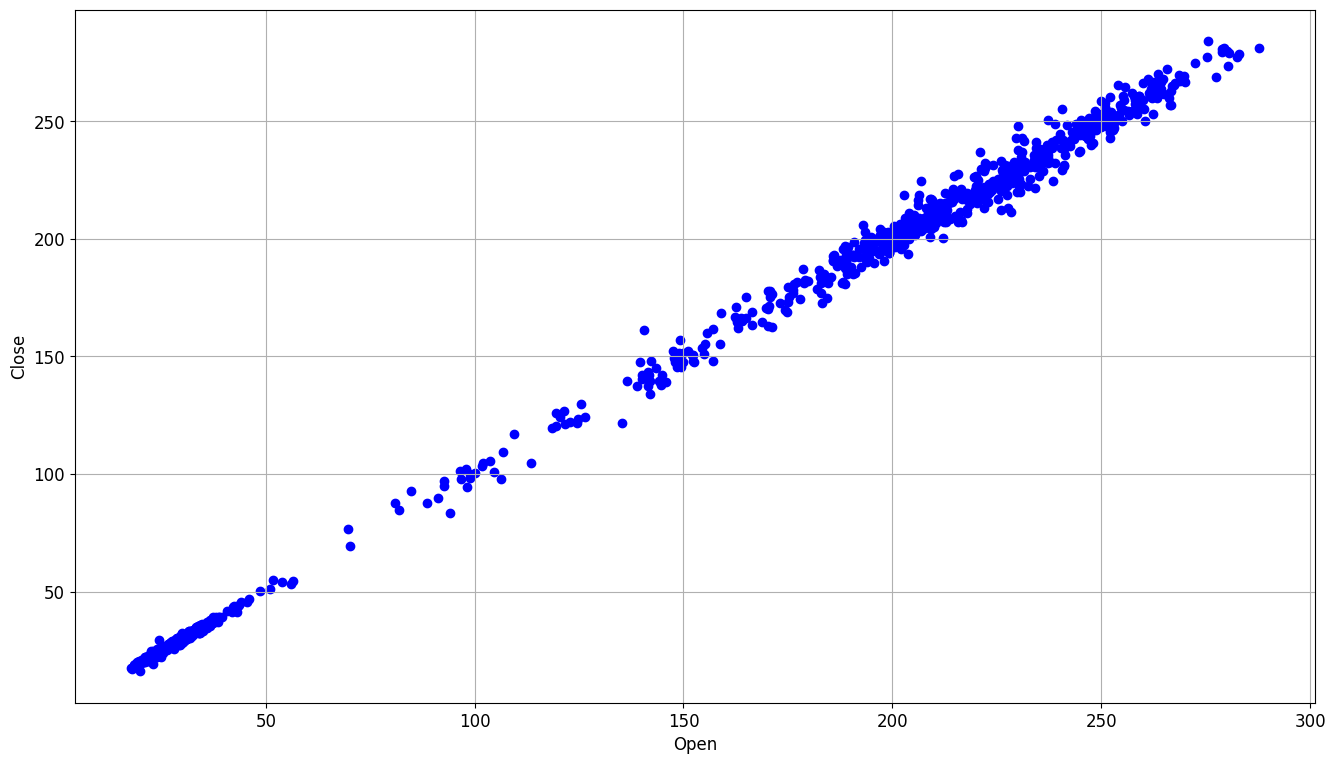

In [ ]:
#Train data distribution
plt.scatter(X_train, y_train, color='blue')
plt.xlabel("Open")
plt.ylabel("Close")
plt.show()

**Using sklearn package for data modelling**

In [ ]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
regr.fit(X_train,y_train)

# The coefficients
print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

Coefficients: [[0.99909979]]
Intercept: [0.13658878]


**Model evaluation**

In [ ]:
from sklearn.metrics import r2_score
test_y_ = regr.predict(X_test)

In [ ]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_-y_test)))
print("Mean squares error (MSE): %.2f" % np.mean((test_y_-y_test)**2))
print("R2-score: %.2f" % r2_score(test_y_,y_test))

Mean absolute error: 2.25
Mean squares error (MSE): 12.27
R2-score: 1.00


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


**3.2 Multiple Linear Regression**

In [ ]:
#separate the other attributes from the predicting attribute
X = df[['Adj Close','Volume','High','Low','Close']]

#separte the predicting attribute into Y for model training
y=df[['Open']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
# importing module
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
# fitting the training data
regr.fit(X_train,y_train)

LinearRegression()

In [ ]:
# The coefficients
print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

Coefficients: [[-3.56776446e-01 -5.22420419e-08  9.49087327e-01  7.63200965e-01
  -3.56776446e-01]]
Intercept: [0.02961347]


In [ ]:
y_prediction =  regr.predict(X_test)
y_prediction

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_prediction-y_test)))
print("Mean squares Error (MSE): %.2f" % np.mean((y_prediction-y_test)**2))
print("R2-score: %.2f" % r2_score(y_prediction,y_test))

Mean absolute error: 1.10
Mean squares Error (MSE): 3.23
R2-score: 1.00


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


**3.1.1 Feature Selection**

Feature selection will be used in an attempt to improve the r2 score of 0.50. SelectKBest() identifies and isolates 'k' highest scoring features in the data, to use in the regression model. 4 will be passed as k.

In [ ]:
# select 4 most important features
selector = SelectKBest(f_regression, k=5)
x_train_selected = selector.fit_transform(X_train,y_train)
x_test_selected = selector.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# map scores to column names
dict_features = dict(zip(selector.scores_, X.columns))
df_feat = pd.DataFrame(dict_features.items(), columns=['scores', 'features'])

# order by score for barplot
df_feat = df_feat.sort_values(by=['scores'], ascending=False)
df_feat.head(4)

,scores,features
2,1.702706e+06,High
3,1.498299e+06,Low
4,7.944929e+05,Close
0,7.944929e+05,Adj Close


A barplot will be visualised showing each features score (in order of importance)

Text(0.5, 1.0, 'Feature importance')

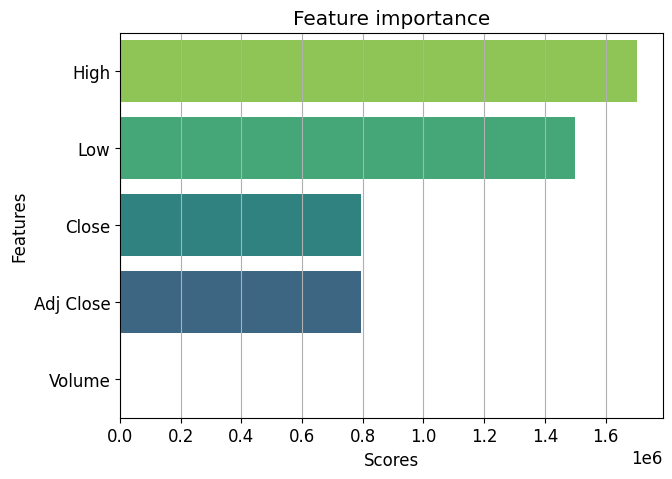

In [ ]:
# barplot of feature importance
plt.figure(figsize=(7,5))
ax = sns.barplot(x='scores', y='features', data=df_feat, palette="viridis_r")
ax.set_xlabel("Scores", fontsize=12)
ax.set_ylabel("Features", fontsize=12)
ax.set_title("Feature importance")

In [ ]:
# feed just the top 4 features through the model
regr = linear_model.LinearRegression()
regr.fit(x_train_selected,y_train)
y_pred = (regr.predict(x_test_selected))

# update scores to models dataframe
r2 = round(r2_score(y_test, y_pred), 2)
mse = round(mean_squared_error(y_test, y_pred),2)
model = "Regression (feature selection)"

new_row = {"model":model, "r2_score":r2, "mean_squared_error":mse}
df = df.append(new_row, ignore_index=True)

# print r2 and MSE for feature selection regression model
print("Mean squared error (MSE): " + str(mse))
print("R2-score: " + str(r2))

Mean squared error (MSE): 3.23
R2-score: 1.0


<ipython-input-46-225f592c5d55>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


Feature selection has not improved the accuracy of the model, resulting in the model still only being able to explain 50% variability of the data. Therefore, using a multiple linear regression model does not prove that listings of a similar or high price would necessarily share common features

**3.2 Decision Tree**

A decision tree regressor will be used to see if price can be predicted, based on other characteristics.
The max_depth argument is the maximum depth in which the tree is able to grow. If left None, the algorithm will handle this argument by itself which will be attempted first. However, a max_depth of 4 will then also be used in order to see if there will be an improvement in the accuracy as an outcome.

In [ ]:
# decision tree with max_depth of 0 and 4
tree = DecisionTreeRegressor(random_state=0)
tree2 = DecisionTreeRegressor(random_state=0, max_depth=4)

tree.fit(X_train,y_train)
tree2.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, random_state=0)

In [ ]:
# predict and compare both regression models
y_pred = tree.predict(X_test)
y_pred2 = tree2.predict(X_test)

print("--- max_depth = None ---")
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_test, y_pred))
print("R2-score: %.2f" % r2_score(y_test,y_pred))

print("\n--- max_depth = 4 ---")
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_test, y_pred2))
print("R2-score: %.2f" % r2_score(y_test,y_pred2))

--- max_depth = None ---
Mean squared error (MSE): 11.03
R2-score: 1.00

--- max_depth = 4 ---
Mean squared error (MSE): 25.56
R2-score: 1.00


As seen above, settling for the default parameter is not always the best option. By doing so for max_depth, resulted in the decision tree algorithm performing much worse than the multiple linear regression previously, with just a score of 26%. Whereas tuning the parameter to 4 improved the model and resulted in an even higher score than that of the linear regression. A higher number than 4 would result in a higher score again, but this would pose the risk of over-fitting the model.

In [ ]:
# add to models dataframe
r2 = round(r2_score(y_test, y_pred2), 2)
mse = round(mean_squared_error(y_test, y_pred2),2)
model = "Decision tree"

new_row = {"model":model, "r2_score":r2, "mean_squared_error":mse}
df = df.append(new_row, ignore_index=True)

<ipython-input-49-f5011e85ab6d>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


The below dataframe compares the r2 score and mean squared error of each model. The XGBoost regressor performed the best.

In [ ]:
df

,Date,Open,High,Low,Close,Volume,Adj Close,model,r2_score,mean_squared_error
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300.0,23.889999,NaN,NaN,NaN
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100.0,23.830000,NaN,NaN,NaN
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800.0,21.959999,NaN,NaN,NaN
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800.0,19.200001,NaN,NaN,NaN
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900.0,16.110001,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600.0,255.729996,NaN,NaN,NaN
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400.0,262.049988,NaN,NaN,NaN
1691,3/17/2017,264.000000,265.329987,261.200012,261.500000,6475900.0,261.500000,NaN,NaN,NaN
1692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Regression (feature selection),1.0,3.23


**3.3 K-Means Clustering**

K-Means clustering will be performed based on the top 10% of prices in the data (df_high) to seperate the data into K number of groups.
All columns apart from log_price/price will be fed into the clustering algorithm in order to determine if the data will contain significant clusters based on these other features. If this is the case, it is possible to conclude that higher priced listings in this dataset actually do share common features, and therefore answer the question posed.

In [ ]:
r = np.nan_to_num(X)
scaled = StandardScaler().fit_transform(r)

To choose the optimal number for K (number of clusters), the elbow method will be used which identifies the most reasonable balance between error and number of clusters. This is done through recording the sum of square distances from each point to its assigned center and will be seen as a noticeable "bend" in the graph below.

In [ ]:
# sse = sum of squared error
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,random_state=4, init="k-means++")
    kmeans.fit(scaled)
    sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

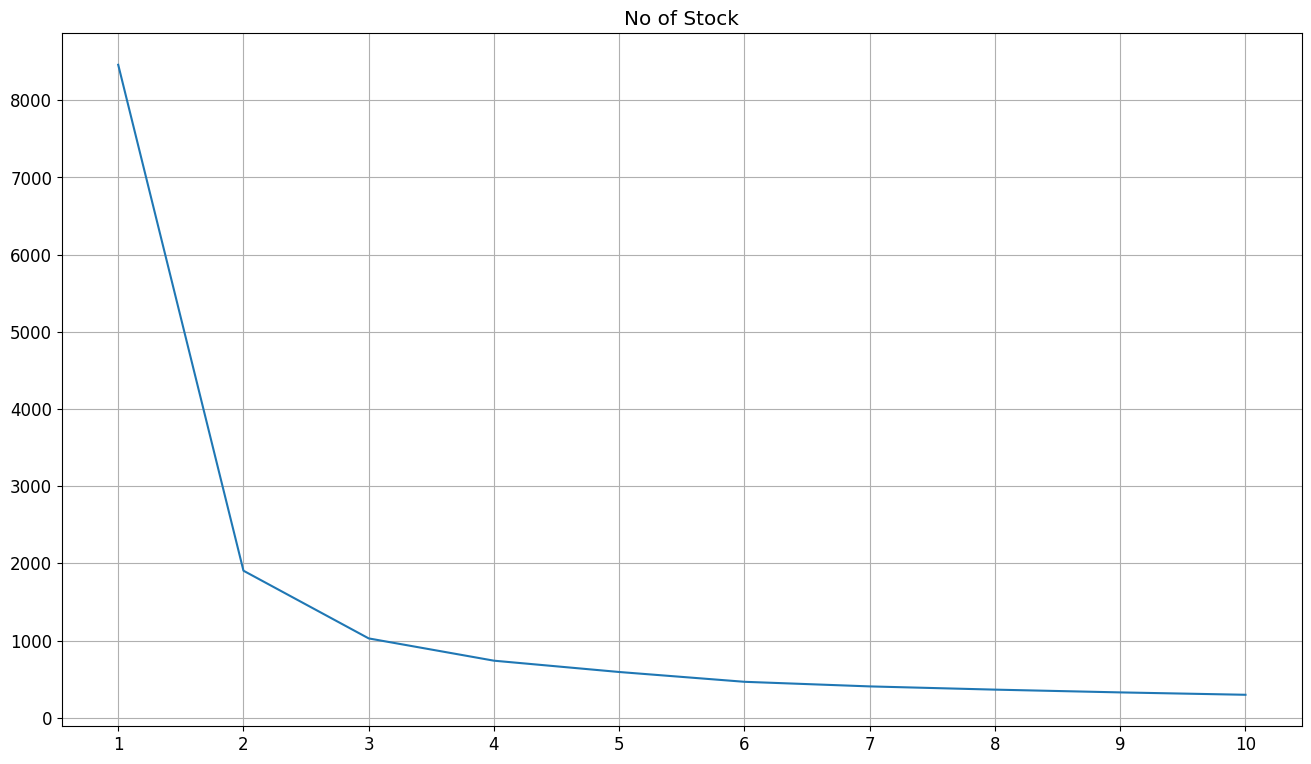

In [ ]:
# finding elbow point
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.title("No of Stock")
plt.show()

However, it is not so clear using this data where the elbow is in the graph. This may hint that there are no distinct clusters in the data and actually there may be some overlap between different clusters.
As the elbow point is not obvious so far, the optimal K value will be calculated progmatically using the KneeLocator() function.

In [15]:
pip install kneed

In [14]:
# calculate elbow point
from kneed import KneeLocator
kl = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
kl.elbow

ModuleNotFoundError: ignored

**4. Results**


In conclusion, our research used a variety of functions to achieve our primary goal of
identifying a clear association of Tesla's stock.
We used a variety of tools to extract data to achieve this goal. We discovered that in the short
run,There are 1692 rows and 7 columns in dataset.
The stock price of Tesla by examining the frequency of High or Low and the stock value
varying over time. Mean absolute error: 2.25
Mean squares error (MSE): 12.27
R2-score: 1.00
In the long run, though, the association becomes more evident when looking at the statistics.
In other words, when the Stock were evaluated across months or years rather than days, the
association was more prominent. We discovered that Tesla's closing price changes had a direct,
parallel association to Musk's engagement after evaluating all of the data.
Our findings are helpful to the general public since they reveal that Elon Musk's Twitter
involvement is a good predictor of stock price rise. Though not entirely correct, the knowledge
provided by the tweets is worth noting before taking any action.

         scores	features

2)1.702706e+06	High

3)1.498299e+06	Low

4)7.944929e+05	Close

5)0	7.944929e+05	Adj Close
